In [38]:
%load_ext autoreload
%autoreload 2
from src.deep import data_loaders
from src.deep.data_loaders import SingleMuDataSet
from src.deep.metrics import Metrics

import numpy as np
from tqdm.notebook import tqdm

from src.optics.channel_simulation import ChannelSimulator
from src.general_methods.visualizer import Visualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

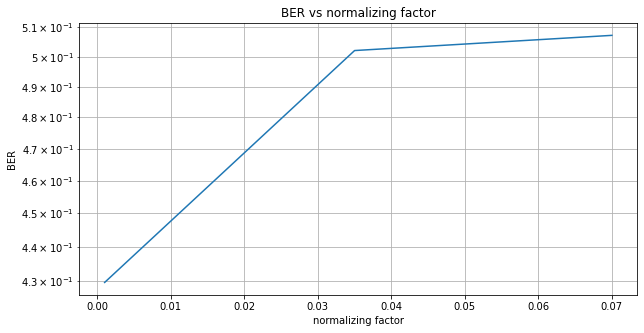

In [39]:
root_dir = f'../../data/datasets/iq/qam1024_10x3'
sub_name_filter = '*'
ber_vec, mu_vec = Metrics.gen_ber_mu_from_folders(root_dir, sub_name_filter, 0, tqdm, 5)
Visualizer.plot_bers(mu_vec, [ber_vec])

the folder ../../data/datasets/iq/qam1024_10x3/10_samples_mu=0.001 contains 10 samples


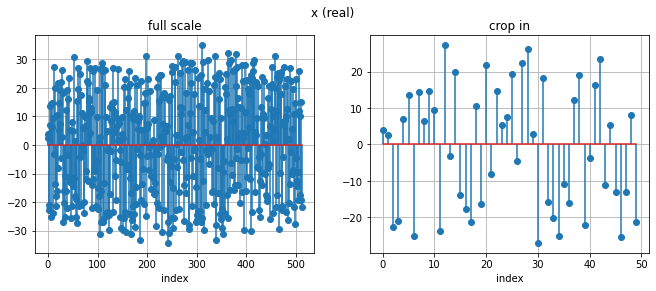

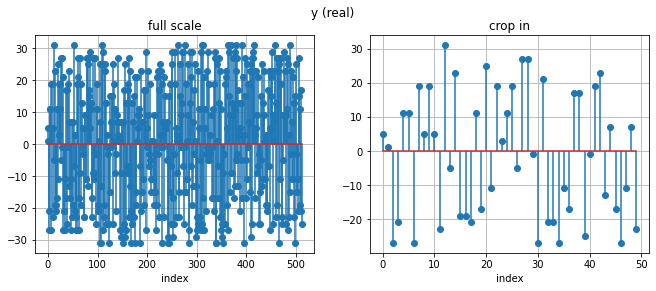

In [40]:
# read folder and plot one of the data samples
sub_name = '10_samples_mu=0.001'
dir = root_dir + '/' + sub_name
data_id = 0

dataset = SingleMuDataSet(dir)

print(f'the folder {dir} contains {len(dataset)} samples')

x, y = dataset.get_numpy_xy(data_id)

# # zm = range(1700, 2300)
# Visualizer.twin_zoom_plot('x', np.real(x), zm)
# Visualizer.twin_zoom_plot('y', np.real(y), zm)
zm = range(0, 50)
Visualizer.twin_zoom_plot('x (real)',np.real(x),zm,function='stem')
Visualizer.twin_zoom_plot('y (real)',np.real(y),zm,function='stem')

In [41]:
# calc signal power
x_power = np.mean(np.abs(x) ** 2)
print(np.mean(np.abs(x/np.sqrt(x_power)) ** 2))


0.9999999999999999


In [42]:
# generate cs based on the config
conf = data_loaders.read_conf(dir)
cs = ChannelSimulator.from_dict(conf)
print(cs)
# plot ber vs mu

{
    "m_qam": 1024,
    "num_symbols": 512,
    "normalization_factor": 0.0005,
    "dt": 1,
    "ssf": {
        "b2": -2e-26,
        "gamma": 0.003,
        "t0": 1.25e-10,
        "dt": 1,
        "z_n": 1000000.0,
        "h": 200
    }
}


In [43]:
# calc ber for each sample
ber_vec, num_errors = Metrics.calc_ber_from_dataset(dataset, False, tqdm, num_x_per_folder=15)
print(f'the avg ber is {np.mean(ber_vec)}')

  0%|          | 0/10 [00:00<?, ?it/s]

the avg ber is 0.4306640625
